In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [25]:
cust = pd.read_csv(r'D:\AnalytxLabs\Python Project\3rd\Customer.csv')
trans = pd.read_csv(r'D:\AnalytxLabs\Python Project\3rd\Transactions.csv')
prod_cat = pd.read_csv(r'D:\AnalytxLabs\Python Project\3rd\prod_cat_info.csv')

In [30]:
trans_cust = pd.merge(left = trans, right = cust, how = 'left', left_on = ['cust_id'], right_on = ['customer_Id'], indicator = False)

In [31]:
Customer_Final = pd.merge(left = trans_cust, right = prod_cat, how = 'left', left_on = ['prod_cat_code', 'prod_subcat_code'], right_on = ['prod_cat_code', 'prod_sub_cat_code'], indicator = False)

In [32]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [99]:
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB, format= '%d-%m-%Y')

In [102]:
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)

In [103]:
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [34]:
print(Customer_Final.columns)

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')


In [43]:
Customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

### b. Top/Bottom 10 observations

In [104]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-10-09,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,1971-04-21,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,275108,1971-11-04,F,8.0,Clothing,3,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,8,Personal Appliances


In [37]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [105]:
def five_num_summary(x):
    min = x.min()
    q1 = x.quantile(0.25)
    median = x.median()
    q3 = x.quantile(0.75)
    max = x.max()
    return pd.Series([min, q1, median, q3, max], index = ['Min', 'Q1', 'Median', 'Q3', 'Max'])

In [106]:
five_num_summary(Customer_Final.total_amt)

Min      -8270.925
Q1         762.450
Median    1754.740
Q3        3569.150
Max       8287.500
dtype: float64

### d. Frequency tables for all the categorical variables

In [107]:
Customer_Final.columns[Customer_Final.dtypes == 'object']

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

In [109]:
pd.crosstab(Customer_Final.Store_type, Customer_Final.Gender, margins = True, margins_name= 'Total')

Gender,F,M,Total
Store_type,,,
Flagship store,2264,2313,4577
MBR,2264,2395,4659
TeleShop,2147,2353,4500
e-Shop,4558,4750,9308
Total,11233,11811,23044


In [110]:
pd.crosstab(Customer_Final.prod_cat, Customer_Final.prod_subcat, margins = True, margins_name= 'Total')

prod_subcat,Academic,Audio and video,Bath,Cameras,Children,Comics,Computers,DIY,Fiction,Furnishing,Kids,Kitchen,Mens,Mobiles,Non-Fiction,Personal Appliances,Tools,Women,Total
prod_cat,,,,,,,,,,,,,,,,,,,
Bags,0,0,0,0,0,0,0,0,0,0,0,0,1003,0,0,0,0,995,1998
Books,967,0,0,0,1035,1031,0,989,1043,0,0,0,0,0,1004,0,0,0,6069
Clothing,0,0,0,0,0,0,0,0,0,0,988,0,967,0,0,0,0,1005,2960
Electronics,0,952,0,985,0,0,958,0,0,0,0,0,0,1031,0,972,0,0,4898
Footwear,0,0,0,0,0,0,0,0,0,0,1009,0,942,0,0,0,0,1048,2999
Home and kitchen,0,0,1023,0,0,0,0,0,0,1007,0,1037,0,0,0,0,1062,0,4129
Total,967,952,1023,985,1035,1031,958,989,1043,1007,1997,1037,2912,1031,1004,972,1062,3048,23053


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [117]:
# Histograms for all continuous variables
cont_var = Customer_Final.iloc[:,[3,4,5,6,7,8]]

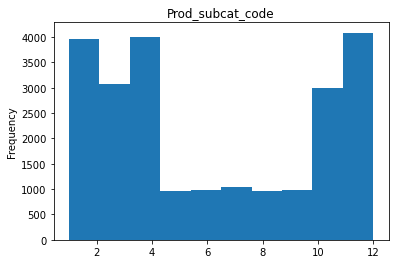

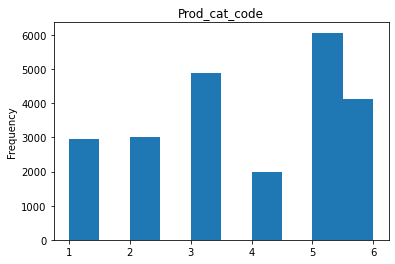

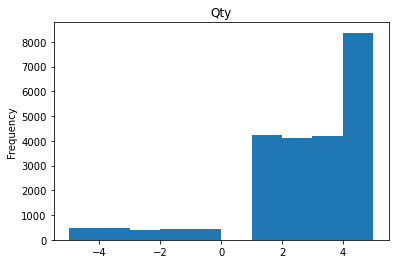

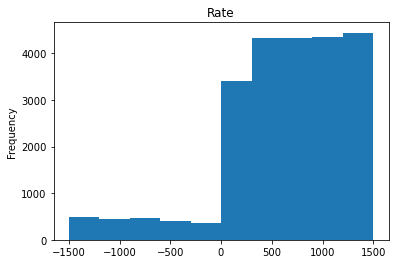

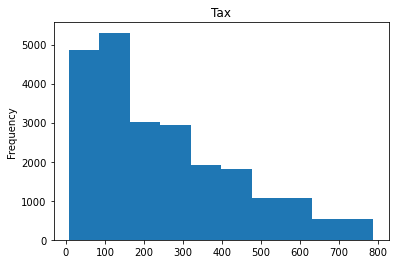

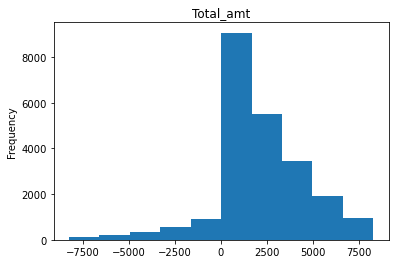

In [126]:
for i in cont_var.columns:
    cont_var[i].plot(kind = 'hist', bins = 10)
    plt.title(i.capitalize())
    plt.show()

In [155]:
# Frequency bars for categorical variables

cat_var = Customer_Final.loc[:,Customer_Final.dtypes == 'object']

In [143]:
cat_var.columns

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


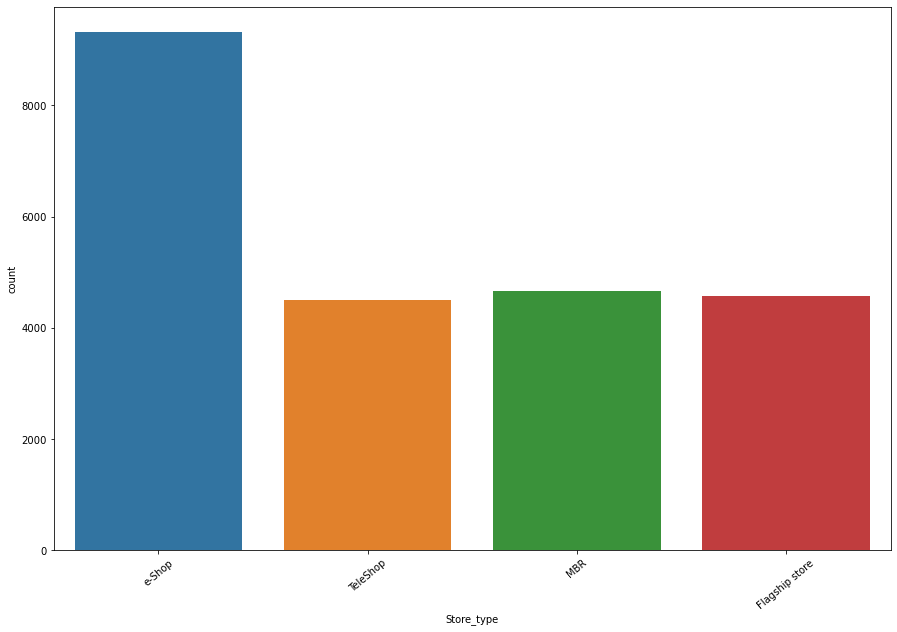

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


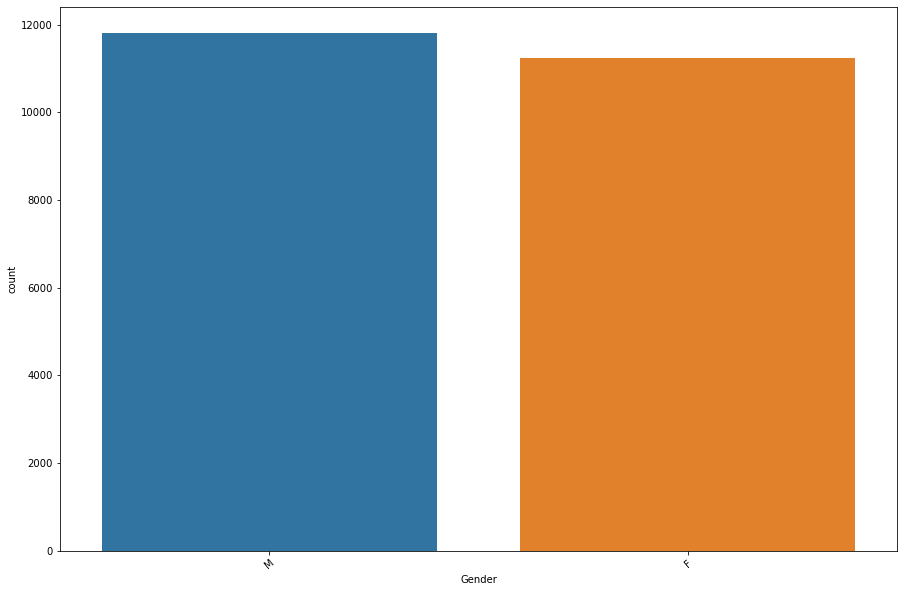

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


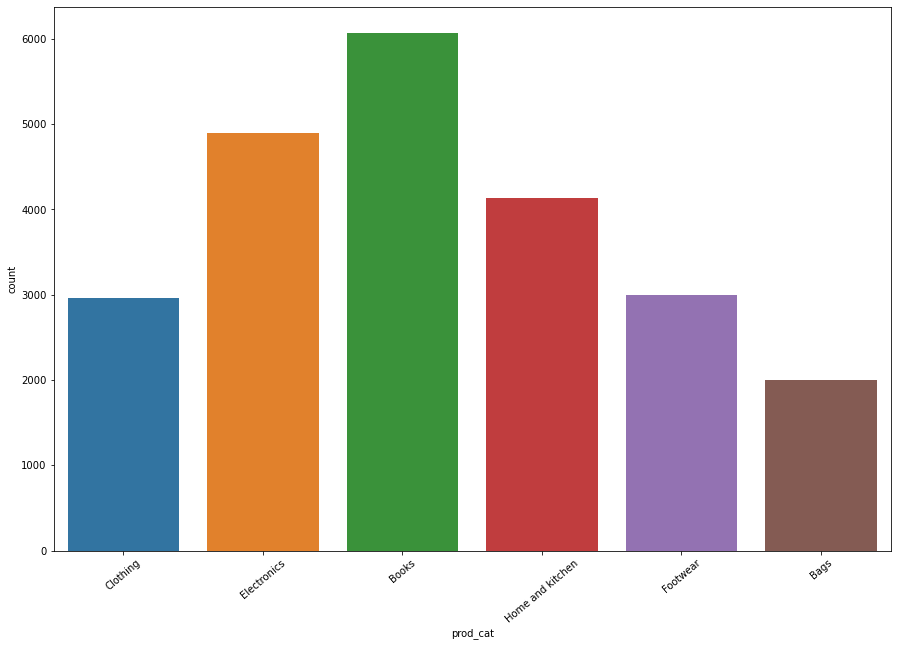

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


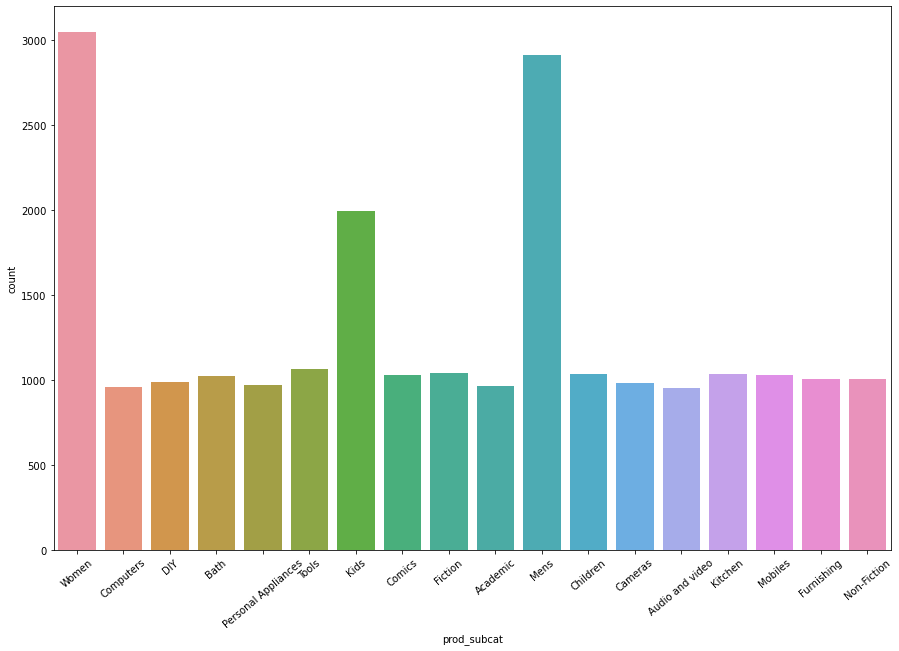

In [162]:
for i in cat_var.columns:
    plt.figure(figsize=(15,10))
    sns.countplot(cat_var[i])
    plt.xticks(rotation = 40)
    plt.show()

## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [177]:
print('Time period of the available transaction data is:', pd.Timestamp.strftime(Customer_Final.tran_date.max(), format= '%d-%m-%Y'),'to',pd.Timestamp.strftime(Customer_Final.tran_date.min(), format= '%d-%m-%Y'))

Time period of the available transaction data is: 02-12-2014 to 02-01-2011


### b. Count of transactions where the total amount of transaction was negative

In [176]:
print('Count of negative transactions is:', Customer_Final.total_amt[Customer_Final.total_amt < 0].count())

Count of negative transactions is: 2177


## 5. Analyze which product categories are more popular among females vs male customers.

In [186]:
cat = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

In [194]:
pd.crosstab(index= Customer_Final.Gender, columns= Customer_Final.prod_cat, values= Customer_Final.Qty, aggfunc= 'sum')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [215]:
max_cust = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending= False).head(1)

In [218]:
(max_cust[4.0]/Customer_Final.groupby('city_code')['customer_Id'].count().sum())*100

10.509871989585594

## 7. Which store type sells the maximum products by value and by quantity?

In [235]:
Customer_Final.groupby('Store_type')[['Rate','Qty']].sum().sort_values(by = 'Rate', ascending= False).head(1)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [249]:
ec_cat = pd.crosstab(index= Customer_Final.prod_cat, columns= Customer_Final.Store_type, values= Customer_Final.total_amt, aggfunc= 'sum')

In [264]:
ec_cat.iloc[2:4,[0]].sum()

Store_type
Flagship store    3409559.27
dtype: float64

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [258]:
m_ttl_amnt = pd.crosstab(index= Customer_Final.Gender, columns= Customer_Final.prod_cat, values= Customer_Final.total_amt, aggfunc= 'sum')

In [263]:
m_ttl_amnt.iloc[1:,[3]]

prod_cat,Electronics
Gender,
M,5703109.425


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [287]:
new_cust_final = Customer_Final[Customer_Final.total_amt > 0]
unique_trans = new_cust_final.groupby(['customer_Id','prod_cat','prod_subcat'])[['transaction_id']].count().reset_index()
unique_trans_count = unique_trans.groupby('customer_Id')[['transaction_id']].count().reset_index()
unique_trans_count[unique_trans_count.transaction_id > 10]
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [315]:
age_25_35 = Customer_Final[(Customer_Final.tran_date.dt.year - Customer_Final.DOB.dt.year >= 25) & (Customer_Final.tran_date.dt.year - Customer_Final.DOB.dt.year <= 35)]
eb_ttl_amnt = age_25_35.groupby('prod_cat')[['total_amt']].sum()
eb_ttl_amnt.iloc[[1,3],:]

,total_amt
prod_cat,
Books,6077900.010
Electronics,5141641.245


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [330]:
age_25_35.loc[(age_25_35.tran_date >= '2014-01-01') & (age_25_35.tran_date <= '2014-03-01')][['total_amt']].sum()

total_amt    685698.91
dtype: float64